# Squad 06 - SafeZone
- Matheus Crasto
- Ozias Nascimento
- Matheus Darlyson
- Jorge Luiz
- André Nascimento


# Informações

- Neste arquivo, estamos fazendo o tratamento e limpeza de dados do DataSet previamente escolhido, porém conforme proposto, todo processo à seguir estará sendo feito utilizando PySpark.
- O DataSet em questão tem a publicação datada em Maio de 2023, e contém registros que
tratam de dados referentes à acidentes de trabalho registrados no INSS no ano de 2023.

- link para o dataset: https://dados.gov.br/dados/conjuntos-dados/inss-comunicacao-de-acidente-de-trabalho-cat1

- Objetivos principais :

  1- Coleta de informações para o processo
de criação do SafeZone, que funciona
como um mediador de ações
preventivas à acidentes de trabalho.

  2- Fazer com que o SafeZone tenha seu
pleno funcionamento, fazendo com
que de fato os acidentes de trabalho
sejam reduzidos (ou extintos).

  3- Análise de dados referentes à
acidentes de trabalho de modo
assertivo, visando ter maiores
informações sobre este campo.

Instalação do pyspark:

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=8fd30bc7358dff0e87d64db8c69960bacc36f04230ef70ca0395c71311453b06
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


Configuração inicial

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("DataSet_SafeZone") \
    .getOrCreate()


Download e importação do DataSet

In [5]:
import gdown
import os

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTTbZxuuk8evum_z_UDT9M7SzMjp-Qh8CaTeBFw5lgCtUlk679QimLQ4Au55aFUd9qZ4OdGWBnb0eIG/pub?output=csv'
output = 'data/datasetCAT.csv'

os.makedirs(os.path.dirname(output), exist_ok=True)

gdown.download(url, output, quiet=False)


/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/e/2PACX-1vTTbZxuuk8evum_z_UDT9M7SzMjp-Qh8CaTeBFw5lgCtUlk679QimLQ4Au55aFUd9qZ4OdGWBnb0eIG/pub?output=csv
To: /content/data/datasetCAT.csv
20.1MB [00:00, 22.3MB/s]


'data/datasetCAT.csv'

In [7]:
# Lendo o arquivo CSV com PySpark
df = spark.read.csv(output, header=True, inferSchema=True)

# Mostrando as primeiras linhas do DataFrame para verificação
df.show(5)

+--------------------------+--------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+-----------------+---------------------+--------------------+--------------------+---------------------------+--------------------+---------+----------------+--------------------+--------------------+---------------+-----------------------+---------------+---------------+----------------+-------------------+
|Agente  Causador  Acidente|Data Acidente1|                 CBO|              CID-10|CNAE2.0 Empregador4| CNAE2.0 Empregador5|       Emitente CAT|Espécie do benefício|Filiação Segurado|Indica Óbito Acidente|          Munic Empr|   Natureza da Lesão|Origem de Cadastramento CAT|Parte Corpo Atingida|     Sexo|Tipo do Acidente|UF  Munic.  Acidente|UF Munic. Empregador|Data Acidente18|Data Despacho Benefício|Data Acidente20|Data Nascimento|Data Emissão CAT|CNPJ/CEI Empregador|
+--------------------------+--------------+---

## Como anteriormente já foram feitas as verificações referentes à dados NULL e/ou NaN e também toda verificação sobre dados incompletos, inconsistentes e também que são fora do escopo, iremos nos deter apenas as operações de tratamento dos dados que estão contidos dentro do DATASET.

## Para consulta do que foi feito anteriormente, ou seja, explanação e verificação dos dados contidos no DataSet, favor verificar o ambiente Colab : https://colab.research.google.com/drive/1iwpetleC8NvkoZvzZCQUwgVLOTLNHyPM?usp=sharing


- Inicio das Operações

Renomeando variáveis

In [8]:
# Dicionário de mapeamento das colunas
new_column_names = {
    'Agente  Causador  Acidente': 'Agente_Causador_Acidente',
    'Data Acidente': 'Data_Acidente',
    'CNAE2.0 Empregador': 'CNAE_Empregador',
    'CNAE2.0 Empregador.1': 'CNAE_Empregador_Descricao',
    'Espécie do benefício': 'Especie_Beneficio',
    'Filiação Segurado': 'Filiacao_Segurado',
    'Indica Óbito Acidente': 'Indica_Obito_Acidente',
    'Munic Empr': 'Municipio_Empregador',
    'Natureza da Lesão': 'Natureza_Lesao',
    'Origem de Cadastramento CAT': 'Origem_Cadastramento_CAT',
    'Parte Corpo Atingida': 'Parte_Corpo_Atingida',
    'Tipo do Acidente': 'Tipo_Acidente',
    'UF  Munic.  Acidente': 'UF_Municipio_Acidente',
    'UF Munic. Empregador': 'UF_Municipio_Empregador',
    'Data Acidente.1': 'Data_Acidente_1',
    'Data Despacho Benefício': 'Data_Despacho_Beneficio',
    'Data Acidente.2': 'Data_Acidente_2',
    'Data Nascimento': 'Data_Nascimento',
    'Data Emissão CAT': 'Data_Emissao_CAT',
    'CNPJ/CEI Empregador': 'CNPJ_CEI_Empregador'
}

# Renomeando colunas
for old_name, new_name in new_column_names.items():
    df = df.withColumnRenamed(old_name, new_name)

# Verificando se as colunas foram renomeadas
df.printSchema()


root
 |-- Agente_Causador_Acidente: string (nullable = true)
 |-- Data Acidente1: string (nullable = true)
 |-- CBO: string (nullable = true)
 |-- CID-10: string (nullable = true)
 |-- CNAE2.0 Empregador4: integer (nullable = true)
 |-- CNAE2.0 Empregador5: string (nullable = true)
 |-- Emitente CAT: string (nullable = true)
 |-- Especie_Beneficio: string (nullable = true)
 |-- Filiacao_Segurado: string (nullable = true)
 |-- Indica_Obito_Acidente: string (nullable = true)
 |-- Municipio_Empregador: string (nullable = true)
 |-- Natureza_Lesao: string (nullable = true)
 |-- Origem_Cadastramento_CAT: string (nullable = true)
 |-- Parte_Corpo_Atingida: string (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Tipo_Acidente: string (nullable = true)
 |-- UF_Municipio_Acidente: string (nullable = true)
 |-- UF_Municipio_Empregador: string (nullable = true)
 |-- Data Acidente18: string (nullable = true)
 |-- Data_Despacho_Beneficio: string (nullable = true)
 |-- Data Acidente20: str

Limpeza dos dados Incompletos (onde AgenteCausador, CBO da Vitima e CID estão ambos como nulos ( {ñ class} )

In [9]:
# Importando funções necessárias
from pyspark.sql.functions import col

# Filtrando registros que possuem "{ñ class}" nas colunas especificadas
filtro_nulos = df.filter((col('Agente_Causador_Acidente') == '{ñ class}') &
                         (col('CBO') == '{ñ class}') &
                         (col('CID-10') == '{ñ class}'))

# Contando registros filtrados
filtro_nulos_count = filtro_nulos.count()
print(filtro_nulos_count)


17


In [10]:
# Filtrando DataFrame para remover registros onde as três colunas são '{ñ class}'
df = df.filter(~((col('Agente_Causador_Acidente') == '{ñ class}') &
                 (col('CBO') == '{ñ class}') &
                 (col('CID-10') == '{ñ class}')))


In [11]:
# Contando o número total de registros após a remoção
total_count = df.count()
print(total_count)

# Verificando se ainda existem registros onde as três colunas são '{ñ class}'
filtro_nulos_restantes = df.filter((col('Agente_Causador_Acidente') == '{ñ class}') &
                                   (col('CBO') == '{ñ class}') &
                                   (col('CID-10') == '{ñ class}'))

# Contando registros restantes
filtro_nulos_restantes_count = filtro_nulos_restantes.count()
print(filtro_nulos_restantes_count)


57482
0



Remoção dos dados onde a Natureza da lesão é classificada como "doença"

In [12]:
# Importando a função regexp_replace para operações com expressões regulares
from pyspark.sql.functions import col

# Filtrando o DataFrame para remover registros onde 'Natureza_Lesao' contém a palavra "doenca"
df = df.filter(~col('Natureza_Lesao').rlike('(?i)doenca'))


In [13]:
# Contando o número total de registros após a remoção
total_count = df.count()
print(total_count)

# Coletando os valores únicos de 'Natureza_Lesao'
natureza_lesao_unicos = df.select('Natureza_Lesao').distinct().collect()

# Exibindo os valores únicos de 'Natureza_Lesao'
natureza_lesao_unicos_list = [row['Natureza_Lesao'] for row in natureza_lesao_unicos]
print(natureza_lesao_unicos_list)


56141
['Queimadura Quimica (Lesao de Tecido Provoca', 'Perda ou Diminuicao Mediatas de Sentido (Au', 'Efeito de Radiacao (Imediato) - Queimadura', 'Amputacao ou Enucleacao', 'Queimadura ou Escaldadura - Efeito de Tempe', 'Pneumoconiose (Silicose, Asbestose, Etc.)', 'Escoriacao, Abrasao (Ferimento Superficial)', 'Inflamacao de Articulacao, Tendao ou Muscul', 'Outras Lesoes, Nic', 'Concussao Cerebral', 'Contusao, Esmagamento (Superficie Cutanea I', 'Intermacao, Insolacao, Caibra, Exaustao e O', 'Lesao Imediata, Nic', 'Perda ou Diminuicao de Sentido (Audicao, Vi', 'Congelamento, Geladura e Outros Efeitos Da', 'Asfixia, Estrangulamento, Afogamento', 'Efeito de Radiacao (Mediato) - Queimadura D', 'Choque Eletrico e Eletroplessao (Eletrocuss', 'Hernia de Qualquer Natureza, Ruptura', 'Corte, Laceracao, Ferida Contusa, Punctura', 'Envenenamento Sistemico - Condicao Morbida', 'Fratura', 'Lesoes Multiplas', 'Lesao Imediata', 'Distensao, Torcao', 'Luxacao', 'Dermatose (Erupcao, Inflamacao da Pele

Exclusão dos dados {ñ class} contidos em Agente_Causador_Acidente e/ou CBO :

In [14]:
# Filtrando o DataFrame para remover registros onde 'Agente_Causador_Acidente' é '{ñ class}'
df = df.filter(col('Agente_Causador_Acidente') != '{ñ class}')

# Contando o número total de registros após a remoção
total_count = df.count()
print(total_count)

# Coletando os valores únicos de 'Agente_Causador_Acidente'
agente_causador_unicos = df.select('Agente_Causador_Acidente').distinct().collect()

# Exibindo os valores únicos de 'Agente_Causador_Acidente'
agente_causador_unicos_list = [row['Agente_Causador_Acidente'] for row in agente_causador_unicos]
print(agente_causador_unicos_list)


53878
['Queda de Pes. com Dif. de Nivel em Esc', 'Talhadeira- Ferramenta Portatil com Forca Mot', 'Painel de Controle, Barramento, Chave, Interr', 'Alcool', 'Rebitadeira- Ferramenta Portatil com Forca Mo', 'Impacto Sofrido por Pes. de Objeto Que Cai', 'Equip. de Guindar, Nic', 'Aerodispersoides', 'Atrito ou Abrasao por Corpo Estranho no Olho', 'Ceramica', 'Eletrica, Exposicao a Energia', 'Equip. Eletrico, Nic', 'Aprision. Em, Sobre ou Entre Objeto Para', 'Aprision. Em, Sobre ou Entre Objetos Em', 'Alicate, Torques, Tenaz- Ferramenta Manual Se', 'Mesa, Carteira, Exceto Mesa Elastica Desmonta', 'Produto Biologico (Soro, Toxina, Antitoxina,', 'Canal, Fosso', 'Maquina, Nic', 'Oleo Combustivel', 'Peneira Mecanica, Maquina Separadora - Maquin', 'Impacto de Pes. Contra Objeto Parado', 'Chave de Parafuso- Ferramenta Manual sem Forc', 'Liquido, Nic', 'Piso de Andaime e Plataforma Desmontavel - Su', 'Coque', 'Poluicao do Ar, Acao Da', 'Agente do Acidente, Nic', 'Formao, Cinzel- Ferramenta Manual

In [15]:
# Filtrando o DataFrame para remover registros onde 'CBO' é '{ñ class}'
df = df.filter(col('CBO') != '{ñ class}')

# Contando o número total de registros após a remoção
total_count = df.count()
print(total_count)

# Coletando os valores únicos de 'CBO'
cbo_unicos = df.select('CBO').distinct().collect()

# Exibindo os valores únicos de 'CBO'
cbo_unicos_list = [row['CBO'] for row in cbo_unicos]
print(cbo_unicos_list)


48070
['773340-Oper. de Serras (Usinagem de Madeira)', '353235-Chefe de Serv. Banc.', '312210-Tec. Saneamento', '782610-Maquinista de Trem', '342510-Despachante Operacional de Vôo', '715130-Oper. Motoniveladora', '141205-Gerente de Prod. e Oper.', '325115-Tec. em Farmácia', '239415-Pedagogo', '420120-Superv. Entrevistadores e Recenseadore', '223555-Enfermeiro Puericultor e Pediátrico', '252205-Auditor (Contadores e Afins)', '811410-Destilador de Prod. Químicos (Exceto P', '311520-Tec. Tratamento de Efluentes', '842115-Classificador de Fumo', '715525-Carpinteiro de Obras', '414215-Conferente Carga e Descarga', '519925-Guardador de Veículos', '950205-Encarregado de Manut. Elétrica de Veíc', '766320-Oper. de Guilhotina (Corte de Papel)', '722115-Forjador Prensista', '812110-Trab. da Fabricação de Munição e Explo', '841805-Oper. Forno (Fabricação de Pães, Bisco', '715715-Inst. Isolantes Térmicos (Refrigeração', '214405-Eng. Mecânico', '631305-Criador Camarões', '252405-Analista de Recursos

Exclusão dos demais dados fora da proposta do SafeZone

In [16]:
# Removendo registros onde 'Agente_Causador_Acidente' é '{Agente do Acidente Inexistente }'
df = df.filter(col('Agente_Causador_Acidente') != 'Agente do Acidente Inexistente')

# Verificando se os registros foram removidos
total_count = df.count()
print(total_count)

# Coletando os valores únicos de 'Agente_Causador_Acidente'
agente_causador_unicos = df.select('Agente_Causador_Acidente').distinct().collect()
agente_causador_unicos_list = [row['Agente_Causador_Acidente'] for row in agente_causador_unicos]
print(agente_causador_unicos_list)


47814
['Queda de Pes. com Dif. de Nivel em Esc', 'Talhadeira- Ferramenta Portatil com Forca Mot', 'Painel de Controle, Barramento, Chave, Interr', 'Alcool', 'Rebitadeira- Ferramenta Portatil com Forca Mo', 'Impacto Sofrido por Pes. de Objeto Que Cai', 'Equip. de Guindar, Nic', 'Aerodispersoides', 'Atrito ou Abrasao por Corpo Estranho no Olho', 'Ceramica', 'Eletrica, Exposicao a Energia', 'Equip. Eletrico, Nic', 'Aprision. Em, Sobre ou Entre Objeto Para', 'Aprision. Em, Sobre ou Entre Objetos Em', 'Alicate, Torques, Tenaz- Ferramenta Manual Se', 'Mesa, Carteira, Exceto Mesa Elastica Desmonta', 'Produto Biologico (Soro, Toxina, Antitoxina,', 'Canal, Fosso', 'Maquina, Nic', 'Oleo Combustivel', 'Peneira Mecanica, Maquina Separadora - Maquin', 'Impacto de Pes. Contra Objeto Parado', 'Chave de Parafuso- Ferramenta Manual sem Forc', 'Liquido, Nic', 'Piso de Andaime e Plataforma Desmontavel - Su', 'Coque', 'Poluicao do Ar, Acao Da', 'Agente do Acidente, Nic', 'Formao, Cinzel- Ferramenta Manual

In [17]:
# Filtrando o DataFrame para remover registros onde 'Agente_Causador_Acidente' é 'Coque' e 'CID-10' está na lista especificada
condition = (col('Agente_Causador_Acidente') != 'Coque') | (~col('CID-10').isin(['W86.4 Rua e Estrada', 'W85.9 Local Ne', 'W87.7 Fazenda']))

df = df.filter(condition)

# Verificando se os registros foram removidos
total_count = df.count()
print(total_count)

# Exibindo alguns registros para verificação
df.select('Agente_Causador_Acidente', 'CID-10').show(5)


47811
+------------------------+--------------------+
|Agente_Causador_Acidente|              CID-10|
+------------------------+--------------------+
|    Ataque de Ser Viv...|M23.8 Outr Transt...|
|    Rua e Estrada - S...|S42.0 Frat da Cla...|
|    Impacto de Pes. C...|Y28.8 Outr Locais...|
|    Chave de Porca ou...|S62.5 Frat do Pol...|
|    Impacto de Pes. C...|           {ñ class}|
+------------------------+--------------------+
only showing top 5 rows



In [18]:
# Lista de valores a serem excluídos
agentes_a_excluir = [
    'Aeronave',
    'Agente Infeccioso ou Parasitario - Inclui Bac',
    'Animal Vivo',
    'Ataque de Ser Vivo com Peconha',
    'Ataque de Ser Vivo com Transmissao de Doenca',
    'Ataque de Ser Vivo por Mordedura, Picada, Chi',
    'Ataque de Ser Vivo, Nic',
    'Bicicleta',
    'Choque',
    'Couro Cru ou Curtido - Produto Animal',
    'Esforco Excessivo ao Empurrar ou Puxar Objeto',
    'Esforco Excessivo ao Erguer Objeto',
    'Esforco Excessivo ao Manejar, Sacudir ou Arre',
    'Esforco Excessivo, Nic',
    'Ferro de Passar- Ferramenta Portatil com Forc',
    'Fruta e Derivados',
    'Leite e Derivados - Inclusive de Origem Anima',
    'Metal - Inclui Liga Ferrosa e nao Ferrosa, Tu',
    'Motocicleta, Motoneta',
    'Osso - Produto Animal',
    'Pele, Crina, Pelo, La (Em Bruto) - Produto An',
    'Piso de Veiculo - Superficie Utilizada para S',
    'Produto Alimenticio - Inclusive de Origem Ani',
    'Produto Animal, Nic',
    'Puncao, Ponteiro, Vazador, Talhadeira- Ferram',
    'Ser Vivo, Nic',
    'Vegetal - Planta, Arvore, em Estado Natural,',
    'Veiculo Aquatico',
    'Veiculo de Terraplenagem',
    'Veiculo de Tracao Animal',
    'Veiculo Deslisante',
    'Veiculo Rodoviario Motorizado',
    'Veiculo Sobre Trilho',
    'Veiculo, Nic',
    'Vestuario, Nic'
]

# Filtrando o DataFrame para remover registros onde 'Agente_Causador_Acidente' está na lista de valores a excluir
df = df.filter(~col('Agente_Causador_Acidente').isin(agentes_a_excluir))

# Verificando se os registros foram removidos
total_count = df.count()
print(total_count)

# Coletando os valores únicos de 'Agente_Causador_Acidente'
agente_causador_unicos = df.select('Agente_Causador_Acidente').distinct().collect()
agente_causador_unicos_list = [row['Agente_Causador_Acidente'] for row in agente_causador_unicos]
print(agente_causador_unicos_list)


37342
['Queda de Pes. com Dif. de Nivel em Esc', 'Talhadeira- Ferramenta Portatil com Forca Mot', 'Painel de Controle, Barramento, Chave, Interr', 'Alcool', 'Rebitadeira- Ferramenta Portatil com Forca Mo', 'Impacto Sofrido por Pes. de Objeto Que Cai', 'Equip. de Guindar, Nic', 'Aerodispersoides', 'Atrito ou Abrasao por Corpo Estranho no Olho', 'Ceramica', 'Eletrica, Exposicao a Energia', 'Equip. Eletrico, Nic', 'Aprision. Em, Sobre ou Entre Objeto Para', 'Aprision. Em, Sobre ou Entre Objetos Em', 'Alicate, Torques, Tenaz- Ferramenta Manual Se', 'Mesa, Carteira, Exceto Mesa Elastica Desmonta', 'Produto Biologico (Soro, Toxina, Antitoxina,', 'Canal, Fosso', 'Maquina, Nic', 'Oleo Combustivel', 'Peneira Mecanica, Maquina Separadora - Maquin', 'Impacto de Pes. Contra Objeto Parado', 'Chave de Parafuso- Ferramenta Manual sem Forc', 'Liquido, Nic', 'Piso de Andaime e Plataforma Desmontavel - Su', 'Coque', 'Poluicao do Ar, Acao Da', 'Agente do Acidente, Nic', 'Formao, Cinzel- Ferramenta Manual

In [19]:
# Definindo as condições de filtro
condition = ((col('Agente_Causador_Acidente') != 'Coque') &
             (~col('CID-10').isin(['W86.4 Rua e Estrada', 'W85.9 Local Ne', 'W87.7 Fazenda'])))

# Aplicando o filtro
df = df.filter(condition)

# Verificando se os registros foram removidos
total_count = df.count()
print(f"Total de registros após filtro: {total_count}")

# Exibindo alguns registros para verificação
df.select('Agente_Causador_Acidente', 'CID-10').show(5)

Total de registros após filtro: 37299
+------------------------+--------------------+
|Agente_Causador_Acidente|              CID-10|
+------------------------+--------------------+
|    Rua e Estrada - S...|S42.0 Frat da Cla...|
|    Impacto de Pes. C...|Y28.8 Outr Locais...|
|    Chave de Porca ou...|S62.5 Frat do Pol...|
|    Impacto de Pes. C...|           {ñ class}|
|    Rua e Estrada - S...|S43.1 Luxacao da ...|
+------------------------+--------------------+
only showing top 5 rows



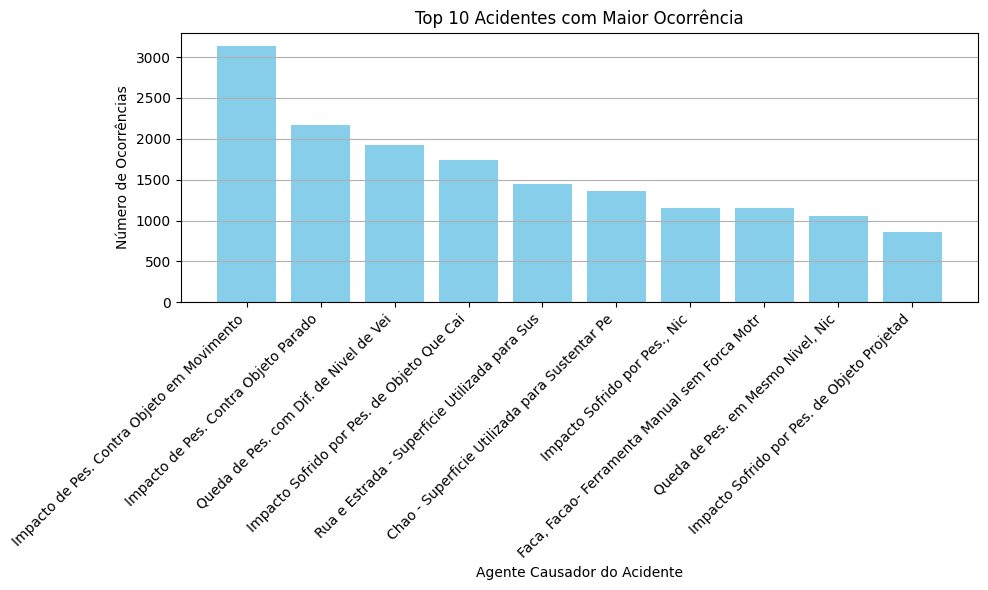

In [20]:
# Agrupando e contando o número de ocorrências de cada 'Agente_Causador_Acidente'
top_10_acidentes_spark = df.groupBy('Agente_Causador_Acidente').count().orderBy(col('count').desc()).limit(10)

# Coletando os resultados para Pandas
top_10_acidentes_pandas = top_10_acidentes_spark.toPandas()

# Encerrando a sessão do Spark
spark.stop()

# Plotando o gráfico com Matplotlib (usando Pandas DataFrame)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_10_acidentes_pandas['Agente_Causador_Acidente'], top_10_acidentes_pandas['count'], color='skyblue')
plt.title('Top 10 Acidentes com Maior Ocorrência')
plt.xlabel('Agente Causador do Acidente')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Em suma: após o tratamento dos dados, foram mantidos 37.299 registros de ocorrências, que fazem parte da proposta do SafeZone. Ou seja, foram descartados apróximadamente 19.700 registros que não fazem parte do escopo principal do projeto, fazendo com que a busca por informações seja mais rápida e também assertiva.